In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", 100)
sns.set_style("whitegrid")


In [2]:
#Load Both Datasets
accepted_path = "../data/raw/appl_accepted_20072019Q3.CSV"
rejected_path = "../data/raw/appl_rejected_20072018Q4.CSV"

accepted = pd.read_csv(accepted_path, low_memory=False)
rejected = pd.read_csv(rejected_path, low_memory=False)

print("Accepted shape:", accepted.shape)
print("Rejected shape:", rejected.shape)


Accepted shape: (2650550, 150)
Rejected shape: (27648741, 9)


Quick Look at Data

In [3]:
accepted.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,...,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,...,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,NaN,...,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Apr-2019,...,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
rejected.head()


,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [5]:
accepted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650550 entries, 0 to 2650549
Columns: 150 entries, id to settlement_term
dtypes: float64(111), object(39)
memory usage: 3.0+ GB


In [6]:
rejected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


Check Missing Values

In [7]:
missing_accepted = accepted.isnull().mean().sort_values(ascending=False) * 100
missing_accepted.head(20)


member_id                                     100.000000
orig_projected_additional_accrued_interest     99.668635
hardship_loan_status                           99.582690
hardship_payoff_balance_amount                 99.582690
hardship_end_date                              99.582690
hardship_type                                  99.582690
hardship_reason                                99.582690
deferral_term                                  99.582690
hardship_status                                99.582690
hardship_amount                                99.582690
hardship_length                                99.582690
hardship_dpd                                   99.582690
hardship_last_payment_amount                   99.582690
hardship_start_date                            99.582690
payment_plan_start_date                        99.582690
debt_settlement_flag_date                      98.696308
settlement_status                              98.696308
settlement_percentage          

In [8]:
missing_rejected = rejected.isnull().mean().sort_values(ascending=False) * 100
missing_rejected.head(20)


Risk_Score              66.902251
Employment Length        3.440862
Loan Title               0.004720
Policy Code              0.003320
Zip Code                 0.001060
State                    0.000080
Amount Requested         0.000000
Debt-To-Income Ratio     0.000000
Application Date         0.000000
dtype: float64

Create Target Variable

In [9]:
accepted["loan_status"].value_counts(normalize=True)


loan_status
Current                                                0.459478
Fully Paid                                             0.419497
Charged Off                                            0.103366
Late (31-120 days)                                     0.010212
In Grace Period                                        0.004296
Late (16-30 days)                                      0.002097
Does not meet the credit policy. Status:Fully Paid     0.000750
Does not meet the credit policy. Status:Charged Off    0.000287
Default                                                0.000017
Name: proportion, dtype: float64

In [10]:
#create a binary target:
accepted["default"] = accepted["loan_status"].isin([
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Charged Off"
]).astype(int)

accepted["default"].value_counts(normalize=True)


default
0    0.896331
1    0.103669
Name: proportion, dtype: float64

Class Imbalance Check

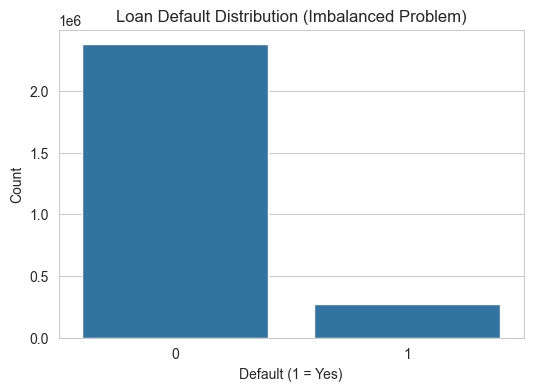

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=accepted["default"])
plt.title("Loan Default Distribution (Imbalanced Problem)")
plt.xlabel("Default (1 = Yes)")
plt.ylabel("Count")
plt.show()


Loan Amount Distribution

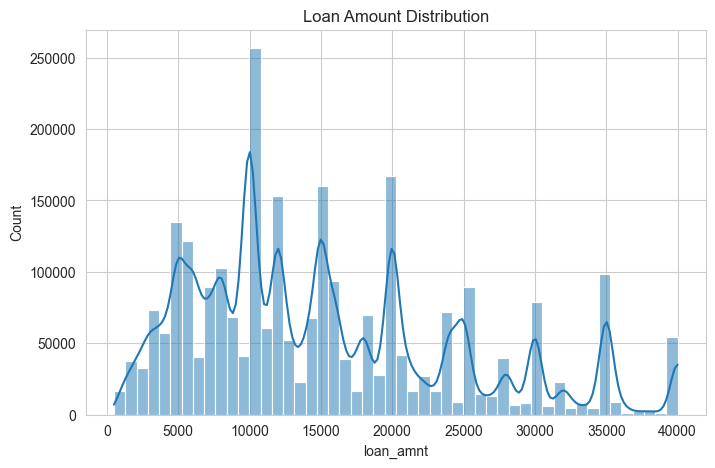

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(accepted["loan_amnt"], bins=50, kde=True)
plt.title("Loan Amount Distribution")
plt.show()


Interest Rate vs Default

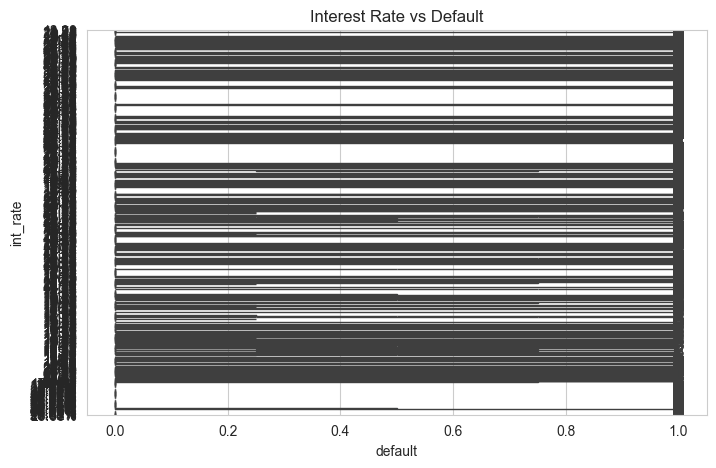

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x="default", y="int_rate", data=accepted)
plt.title("Interest Rate vs Default")
plt.show()


Annual Income vs Default

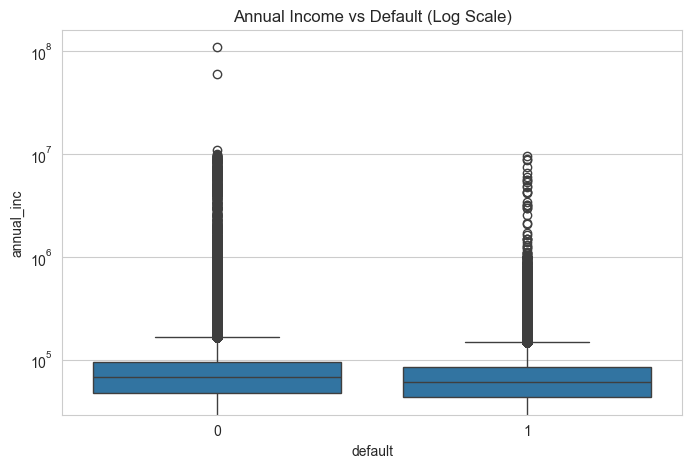

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="default", y="annual_inc", data=accepted)
plt.yscale("log")  # better visualization
plt.title("Annual Income vs Default (Log Scale)")
plt.show()


Employment Length vs Default

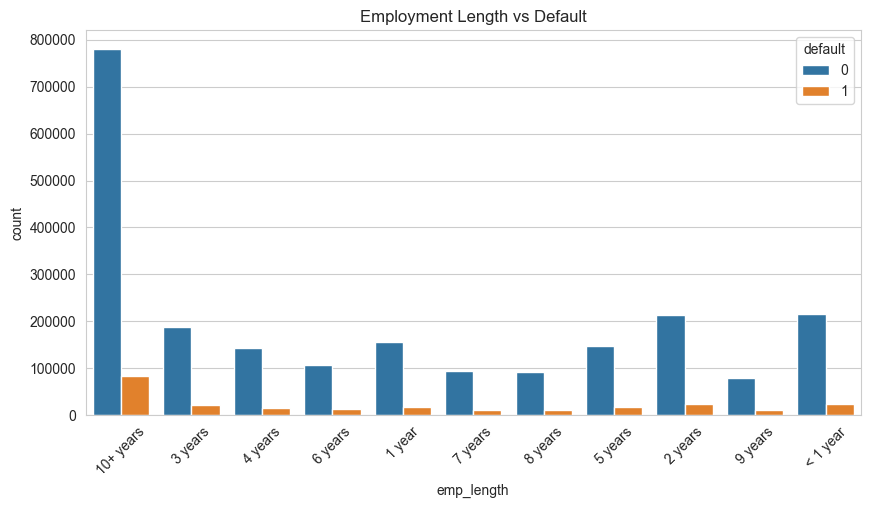

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x="emp_length", hue="default", data=accepted)
plt.xticks(rotation=45)
plt.title("Employment Length vs Default")
plt.show()


Credit Grade vs Default

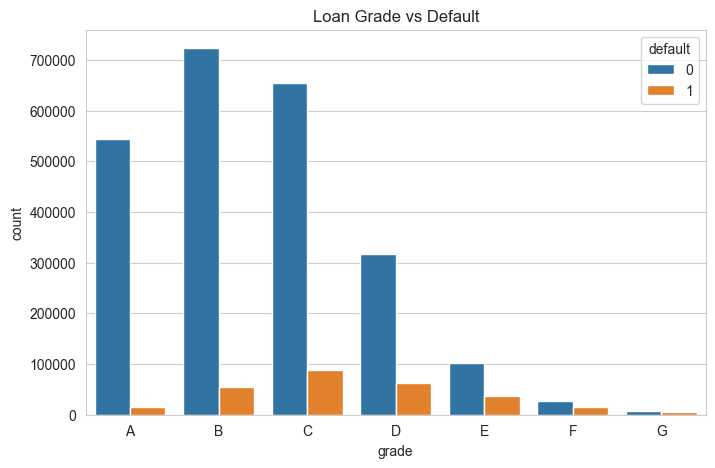

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x="grade", hue="default", data=accepted, order=sorted(accepted["grade"].dropna().unique()))
plt.title("Loan Grade vs Default")
plt.show()


Purpose of Loan vs Default

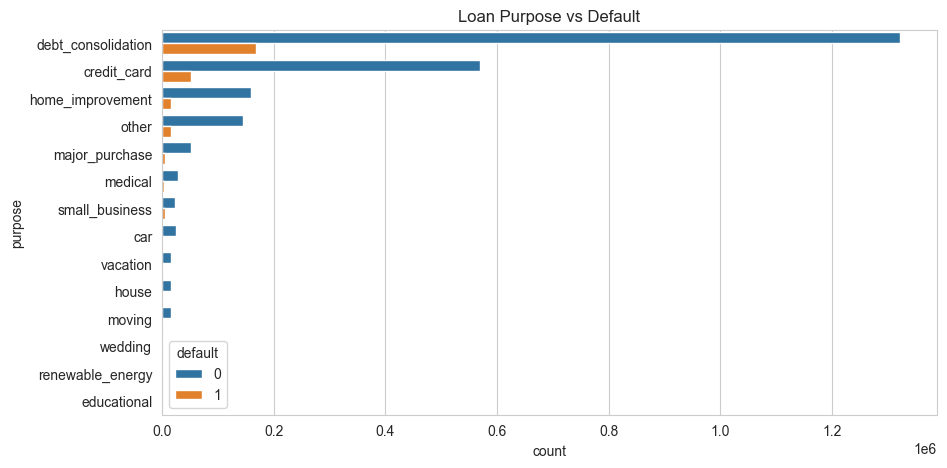

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(y="purpose", hue="default", data=accepted,
              order=accepted["purpose"].value_counts().index)
plt.title("Loan Purpose vs Default")
plt.show()


Correlation Heatmap

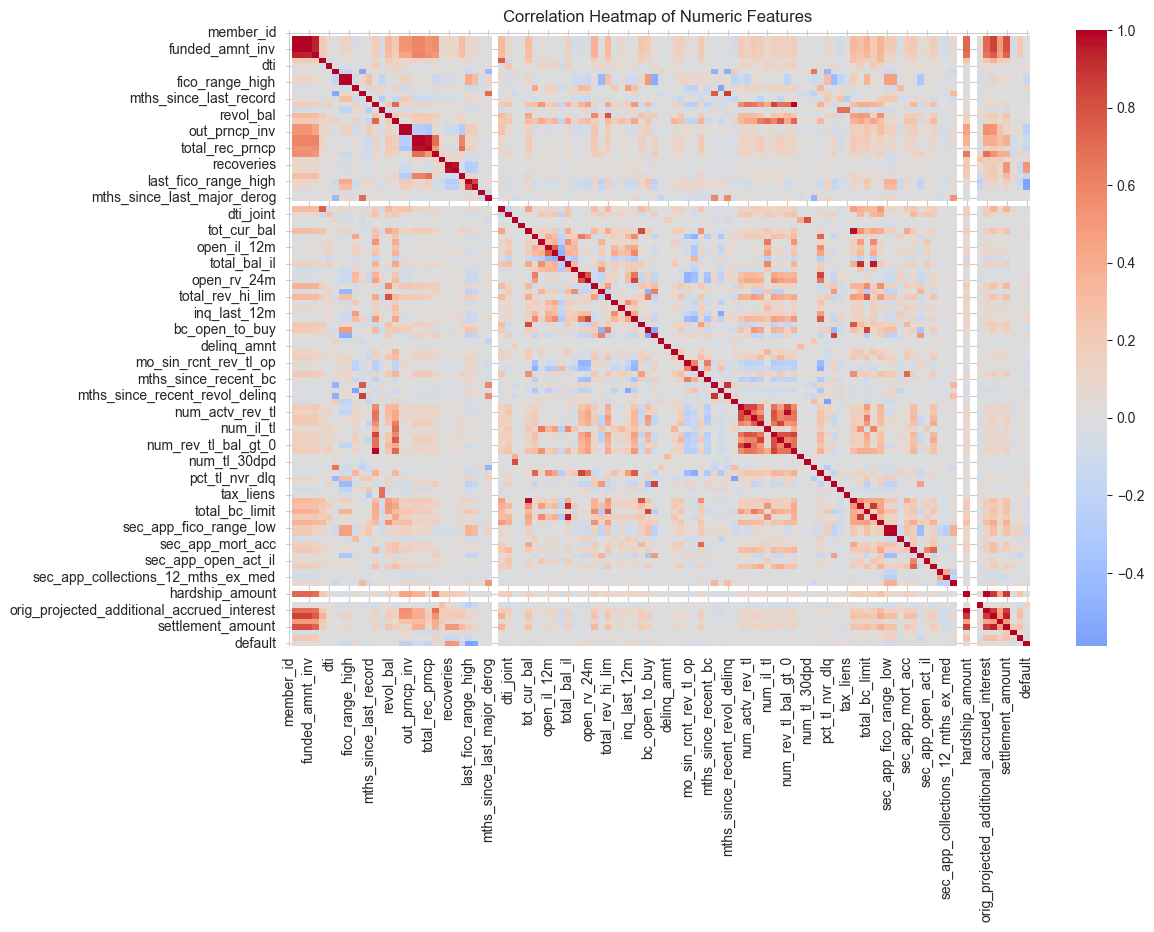

In [18]:
num_cols = accepted.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(12,8))
sns.heatmap(accepted[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Save Cleaned EDA Version

In [19]:
accepted.to_csv("../data/accepted_with_default.csv", index=False)
print("Saved cleaned accepted dataset with default column.")
rejected.to_csv("../data/rejected_cleaned.csv", index=False)
print("Saved cleaned rejected dataset.")

Saved cleaned accepted dataset with default column.
Saved cleaned rejected dataset.
